In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset :

In [2]:
data = pd.read_csv('wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Data Cleaning :

In [3]:
data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [4]:
data.shape

(178, 14)

In [5]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [7]:
data['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [8]:
data['Wine'].value_counts(normalize= True)

2    0.398876
1    0.331461
3    0.269663
Name: Wine, dtype: float64

In [9]:
data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [10]:
### This are the columns where there is an outlier.. 

#sns.boxplot(data['Malic.acid'])
#sns.boxplot(data['Ash'])
#sns.boxplot(data['Acl'])
#sns.boxplot(data['Mg'])
#sns.boxplot(data['Proanth'])
#sns.boxplot(data['Color.int'])

### Calculate the correlation for the numeric variables

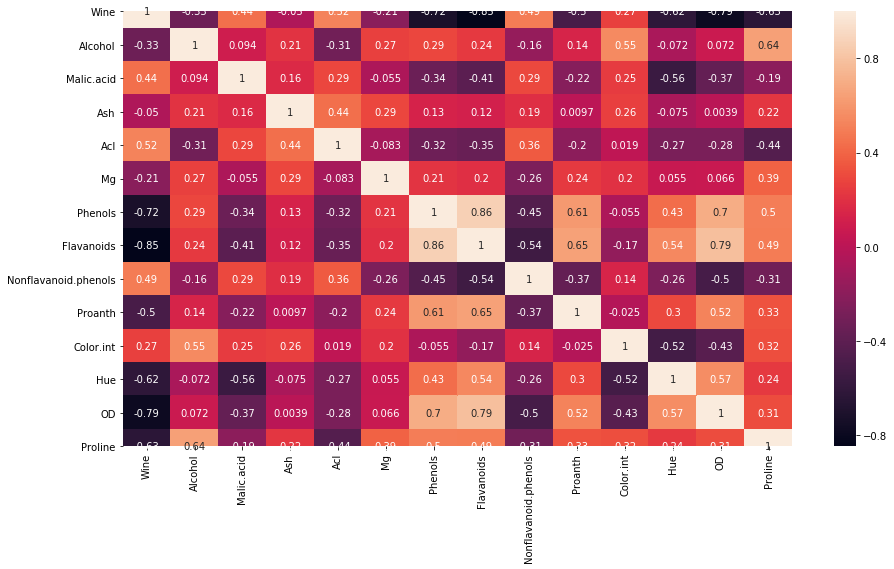

In [11]:
corr = data.corr()

# setting the size of the figure
plt.figure(figsize= (15,8))

# plot the correlation using the heatmap
ax = sns.heatmap(corr, annot = True)

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

data_rs = rs.fit_transform(data)

data_rs = pd.DataFrame(data_rs)
data_rs.columns = data.columns

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

In [14]:
data_sc = pd.DataFrame(data_sc)
data_sc.columns = data.columns

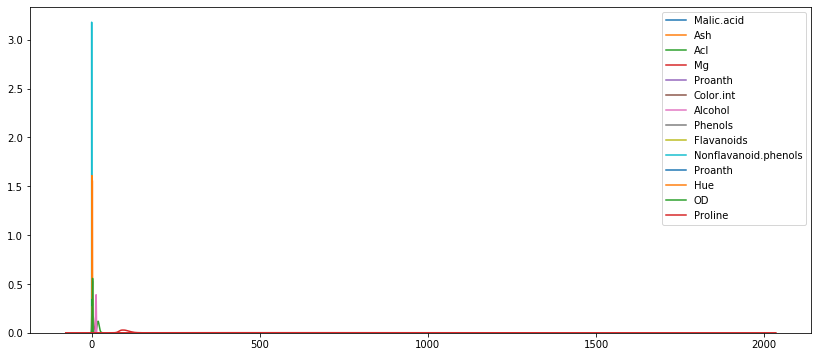

In [15]:
plt.figure(figsize=(14,6))                        
#plt.ylim(0, 0.6) 

sns.kdeplot(data['Malic.acid'])
sns.kdeplot(data['Ash'])
sns.kdeplot(data['Acl'])
sns.kdeplot(data['Mg'])
sns.kdeplot(data['Proanth'])
sns.kdeplot(data['Color.int'])
sns.kdeplot(data['Alcohol'])
sns.kdeplot(data['Phenols'])
sns.kdeplot(data['Flavanoids'])
sns.kdeplot(data['Nonflavanoid.phenols'])
sns.kdeplot(data['Proanth'])
sns.kdeplot(data['Hue'])
sns.kdeplot(data['OD'])
sns.kdeplot(data['Proline'])

### splitting the data into X and y

In [16]:
X = data.drop('Wine', axis = 1)
y = data['Wine']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    random_state = 0)


### Fitting a KNN model :


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred_knn = knn.predict(X_test)

In [21]:
ls = [y_test!=y_pred_knn]
len(ls)

1

In [22]:
print('KNN Score = ', knn.score(X_test, y_test)*100)

KNN Score =  80.55555555555556


In [23]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_knn)*100)

Accuracy :  80.55555555555556


In [24]:
cm = confusion_matrix(y_test, y_pred_knn)
print('confusion matrix is : ', cm, sep='\n')

confusion matrix is : 
[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]


### Logistic Regression Model :

In [25]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()

model = classifier_log.fit(X_train, y_train)

C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
y_pred_log = classifier_log.predict(X_test)

In [27]:
# checking the accuracy of the model

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log, y_test)*100)

94.44444444444444


### Random Forest Classifier :

In [28]:
from sklearn.ensemble import RandomForestClassifier  
classifier_forest = RandomForestClassifier(n_estimators= 100, 
                                          criterion= 'entropy',
                                          random_state= 0)
model = classifier_forest.fit(X_train, y_train)

In [29]:
# predicting on the test data
y_pred_forest = classifier_forest.predict(X_test)

In [30]:
# Checking the accuracy of the model
print(accuracy_score(y_pred_forest, y_test)*100)

94.44444444444444


#### So here we can observe that both Logistic Regression model and Random Forest Classifier are given the same accuracy score for the respected model. 